<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/recomenda%C3%A7%C3%A3o_ativ_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fazer a leitura de arquivos CSV com pandas;
Renomear as colunas;
Utilizar a função describe para ver as informações numéricas;
Utilizar o value_counts para contar a frequência;
Mudar o índice com a função set_index ();
Usar a função loc[] para localizar valores;
Fazer uma inclusão de coluna;
Ordernar pela quantidade com a função sort_values(); Deixar a ordenação de maneira decrescente com o parâmetro ascending = False ;
Agrupar os dados com a função groupby( ); 
Fazer uma query;




In [366]:
import pandas as pd 
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId") #colocar indice 
filmes.head(2)

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy


In [367]:
filmes.describe()


,titulo,generos
count,58098,58098
unique,58020,1643
top,The Midnight Man (2016),Drama
freq,2,8402


In [368]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioID" , "filmesID", "nota", "momento"]
notas.head(2)

,usuarioID,filmesID,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456


In [369]:
notas.describe()

,usuarioID,filmesID,nota,momento
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


#primeira tentativa de recomentação 
nota media total de votos



In [370]:
# nao sei nada sobre as pessoas, so dos filmes
#filme+numero de avaliações
notas["filmesID"].value_counts()


318       97999
356       97040
296       92406
593       87899
2571      84545
          ...  
182317        1
170171        1
149562        1
151521        1
127705        1
Name: filmesID, Length: 53889, dtype: int64

In [371]:
filmes.loc[356] # localizar = loc

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [372]:
# ordenar pelos mais votados e recomendar 
total_de_votos = notas["filmesID"].value_counts()
total_de_votos.head(2)

318    97999
356    97040
Name: filmesID, dtype: int64

In [373]:
#Filmes ta indexado pelo ID criar coluna
#ele tenta bater o indice da serie e so data frame 
filmes['total_de_votos'] = total_de_votos
filmes.head(2)

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469.0
2,Jumanji (1995),Adventure|Children|Fantasy,27143.0


In [374]:
# ordena os filmes pelos votos 
filmes.sort_values("total_de_votos").head(2)
#o padrao do pandas é ordenar de forma crescente do menor para o maior 

,titulo,generos,total_de_votos
filmeId,,,
159684,Point Zero (2015),Drama|Thriller,1.0
152167,Ho visto le stelle (2003),Comedy,1.0


In [375]:
filmes.sort_values("total_de_votos", ascending = False).head(2)
#o padrao do pandas é ordenar de forma crescente do menor para o maior 
#colocar ascendending 

,titulo,generos,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0


In [376]:
ordenado = filmes.sort_values("total_de_votos", ascending = False)
ordenado.head(2)
#2 primeirs indicações 

,titulo,generos,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0


In [377]:
#mais avaliados. verificar a nota 
notas.head(2)

,usuarioID,filmesID,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456


In [378]:
#agrupar os filmes pela media 
notas.groupby("filmesID").mean().head(2)

,usuarioID,nota,momento
filmesID,,,
1,141939.237859,3.886649,1.128094e+09
2,142395.293962,3.246583,1.105961e+09


In [379]:
#agrupar os filmes pela media das notas , filtrar no inicio ou no final 
notas.groupby("filmesID").mean()["nota"]

filmesID
1         3.886649
2         3.246583
3         3.173981
4         2.874540
5         3.077291
            ...   
193876    3.000000
193878    2.000000
193880    2.000000
193882    2.000000
193886    3.250000
Name: nota, Length: 53889, dtype: float64

In [380]:
# atribuir variavel 
notas_medias = notas.groupby("filmesID").mean()["nota"]
notas_medias.head(2)

filmesID
1    3.886649
2    3.246583
Name: nota, dtype: float64

In [381]:
#agora colocar a medias no data frame dos filmes 
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(2)
#agrupar os filmes pela media das notas , filtrar no inicio ou no final 

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0,4.424188
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0,4.056585


# SEGUNDA HEURÍSTICA, nota media , filtrando votos


In [382]:
filmes.sort_values("total_de_votos", ascending = False).head(2)
# coloco dentro do meu data frame na variavel filmes 

#agrupar os filmes pela media das notas , filtrar no inicio ou no final 


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0,4.424188
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0,4.056585


In [383]:
# so quero saber de filmes com votos maiores que 10 , fazer uma query 
filmes.query("total_de_votos >= 300").head(2)



,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469.0,3.886649
2,Jumanji (1995),Adventure|Children|Fantasy,27143.0,3.246583


In [384]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(2)
#notas mais altas, na media 
#maior numero de votos


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
171011,Planet Earth II (2016),Documentary,853.0,4.486518
159817,Planet Earth (2006),Documentary,1384.0,4.458092


recomendar a partir de filmes que ja asisti 
#3
Fazer uma filtragem dos dados com query;
Ordenar dados pela média;
Comparar duas tabelas e remover os dados repetidos;
Utilizar o parâmetro erros=’ignore’ para ignorar qualquer erro na função drop().

In [385]:
eu_assisti = [1, 21,19,10,11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469.0,3.886649
21,Get Shorty (1995),Comedy|Crime|Thriller,25699.0,3.568368
19,Ace Ventura: When Nature Calls (1995),Comedy,24913.0,2.642014
10,GoldenEye (1995),Action|Adventure|Thriller,33086.0,3.431633
11,"American President, The (1995)",Comedy|Drama|Romance,19669.0,3.660278
7,Sabrina (1995),Comedy|Romance,15301.0,3.371348
2,Jumanji (1995),Adventure|Children|Fantasy,27143.0,3.246583


aprendizado


In [386]:
#recomendar a partir do que assisti, genero ver o ultimo , 3 generos simultaneamente 
filmes.query("generos=='Adventure|Children|Fantasy'").head(2)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,27143.0,3.246583
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,7601.0,3.071241


In [387]:
#recomendar a partir do que assisti, genero ver o ultimo , 3 generos simultaneamente 
#filtrar sort_valueS
filmes.query("generos=='Adventure|Children|Fantasy'").sort_values("nota_media", ascending = False).head(2)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
189473,"Red, Honest, in Love (1984)",Adventure|Children|Fantasy,2.0,4.25
191773,Up in the Sky (2016),Adventure|Children|Fantasy,2.0,4.00


In [388]:
###### total votos dos  filmes é baixo
#filtrar mais votos -- query e sort

aventura_criança_fantasia = filmes_com_mais_de_50_votos.query("generos =='Adventure|Children|Fantasy'")
aventura_criança_fantasia.sort_values("nota_media").head(2)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,1543.0,2.344783
2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,2408.0,2.488164


In [389]:
#agora eu removo o que ja assisti
# drop os filmes que ja assisti e ignore o erro pq nao sao todos do mesmo genero
aventura_criança_fantasia = filmes_com_mais_de_50_votos.query("generos =='Adventure|Children|Fantasy'")
aventura_criança_fantasia.drop(eu_assisti, errors = 'ignore').sort_values("nota_media", ascending = False).head(2)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,27434.0,3.674892
80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,117.0,3.564103


# collaborative filtering (conteudo geral ) 
#content based filtering ( considero o meu usuario) 
posso beyond accuracy , ver se ele realmente assistiu a minha recomendação e tb add diversity .
mais de uma sequencia de recomendação 
(assista novamnete, pq assistiu, continue assistindo, separamos para vc)

## distancia euclediana  ... 
## Procurar pessoas similares ,ver os mais proximos  
se nao gostou do filme o que os demais que nao gostaram assistiram 

Procurar dados similares em relação às características deles;
Mostrar graficamente a distância entre os dados;
Legendar e criar uma linha no gráfico;
Utilizar a função sqrt para gerar a raiz quadrada;
Criar um array do numpy para fazer a subtração das listas;
Utilizar a função np_linalg.norm para gerar o valor das distâncias;
Usar a função join para juntar os dados;
Utilizar o lsufix e o rsufix para juntar os dados adjacentes;
Utilizar a função dropna para remover valores nulos.

Text(0.5, 1.0, 'distancia entre 2 usuarios ')

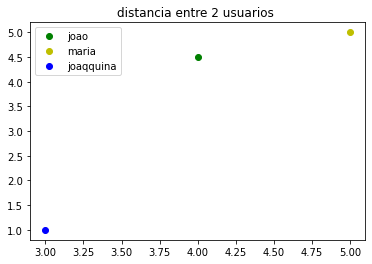

In [390]:
#grafico 
import matplotlib.pyplot as plt
plt.plot (4, 4.5, "go") #green
plt.plot(5, 5, "yo")
plt.plot ( 3, 1, "bo") #blue
plt.legend(["joao", "maria", "joaqquina"])
plt.title("distancia entre 2 usuarios ")

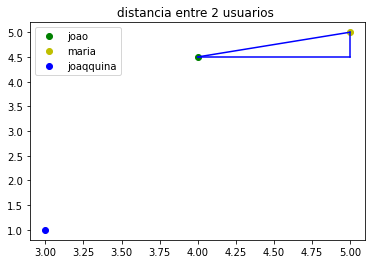

In [391]:
# add linhas no grafico 
import matplotlib.pyplot as plt
plt.plot (4, 4.5, "go") #green
plt.plot(5, 5, "yo")
plt.plot ( 3, 1, "bo") #blue
plt.legend(["joao", "maria", "joaqquina"])
plt.title("distancia entre 2 usuarios ")

plt.plot([4,5], [4.5, 4.5], color = "b", linestyle = "-")
plt.plot([4,5], [4.5, 5], color = "b", linestyle = "-")
plt.plot([5,5], [4.5, 5], color = "b", linestyle = "-")

In [392]:
# calculo da distancia pitagoras (norm)
import numpy as np 
joao = np.array ([4, 4.5])
maria = np.array([ 5,5])
joaquina = np.array([3, 1])

In [393]:
# def pitagoras ,linha,  algebra , norma 
from math import sqrt
np.linalg.norm(joao - maria) 


1.118033988749895

In [394]:
np.linalg.norm(joao - joaquina)

3.640054944640259

In [395]:
from math import sqrt
def pitagoras (a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)


In [397]:
# determinar a distancia entre das pessoa pelas notas,  

def distancia(a,b):
  return np.linalg.norm(a-b)


In [399]:
# extrair as notas do usuario 1 e 4
notas.head(2)


,usuarioID,filmesID,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456


In [400]:
#filtar usuario Id
notas.query("usuarioID ==1").head(2)


,usuarioID,filmesID,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456


In [401]:
#filtar usuario Id sem o momento #arrey []
notas_do_usuario = notas.query("usuarioID ==1")
notas_do_usuario[["filmesID", "nota"]].head(2) #[[]]


,filmesID,nota
0,307,3.5
1,481,3.5


In [402]:
#tirar o indice , deixar o  filme Id como indice 
notas_do_usuario = notas.query("usuarioID ==1")
notas_do_usuario[["filmesID", "nota"]].set_index("filmesID").head(2)


,nota
filmesID,
307,3.5
481,3.5


In [404]:
notas_do_usuario = notas.query("usuarioID ==1")
notas_do_usuario[["filmesID", "nota"]].set_index("filmesID")
notas_do_usuario.loc[1] # loc localiza pelo indice 



usuarioID    1.000000e+00
filmesID     4.810000e+02
nota         3.500000e+00
momento      1.256677e+09
Name: 1, dtype: float64

In [405]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioID ==%d" % usuario) #%d inteiro
  notas_do_usuario[["filmesID", "nota"]].set_index("filmesID")
  return notas_do_usuario

In [406]:

def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)

In [407]:

usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [408]:
notas_do_usuario(1).head(2)

,usuarioID,filmesID,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456


In [409]:
notas_do_usuario(4).head(2)


,usuarioID,filmesID,nota,momento
42,4,1,4.0,1113765937
43,4,2,4.0,1113767306


In [410]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)
usuario4.head(2)


,usuarioID,filmesID,nota,momento
42,4,1,4.0,1113765937
43,4,2,4.0,1113767306


In [411]:
usuario4.drop(columns= ["momento", "usuarioID"], inplace =True )
usuario4.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,filmesID,nota
42,1,4.0
43,2,4.0


In [412]:

usuario1.drop(columns= ["momento", "usuarioID"], inplace =True )
usuario1.head(2)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,filmesID,nota
0,307,3.5
1,481,3.5


In [413]:
usuario4.set_index("filmesID", inplace=True) 
usuario4.head(2)


,nota
filmesID,
1,4.0
2,4.0


In [414]:
usuario1.head(2)

,filmesID,nota
0,307,3.5
1,481,3.5


In [415]:
#de filme e filme juntar 2 data frane  join
usuario1.join(usuario4 ,lsuffix="_esquerda1", rsuffix="_direita4" ).head(2) #mudar o nome da coluna, nota nota, a esqueda left 
#so traz as linhas do join da esquerda ( a referencia é o usuario 1 )
#se tiver 1 filme que so o usuario 4 assistiu nao aparece



,filmesID,nota_esquerda1,nota_direita4
0,307,3.5,NaN
1,481,3.5,4.0


In [416]:
#comparar os filmes que os 2 assistiram ok , agora remover os filmes que so 1 assistiu
#Drop NAN not a number
usuario1.join(usuario4 ,lsuffix="_esquerda1", rsuffix="_direita4" ).dropna().head(2)

,filmesID,nota_esquerda1,nota_direita4
1,481,3.5,4.0
2,1091,1.5,4.0


In [417]:
#calcular a diferença de 2 vetores ( a-b ) ao quadrado

def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)



In [418]:
diferencas = usuario1.join(usuario4 ,lsuffix="_esquerda", rsuffix="_direita" ).dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
#distancia entre eles ( total)

4.272001872658765

# função dif usuario ID 

def distancia_de_usuarios(usuario_id1, usuario_id2):
  #pegar a nota 
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  #tirar as diferenças notas
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
 # distancia das diferenças
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
 # return [usuario_id1, usuario_id2, distancia]

In [420]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [356]:
distancia_de_usuarios(1,4)

[1, 4, 0.0]

# distancia entro todos, quem é mais perto do usuario 



In [421]:
notas['usuarioID']

0                1
1                1
2                1
3                1
4                1
             ...  
27753439    283228
27753440    283228
27753441    283228
27753442    283228
27753443    283228
Name: usuarioID, Length: 27753444, dtype: int64

In [422]:
notas['usuarioID'].unique()

array([     1,      2,      3, ..., 283226, 283227, 283228])

In [423]:
#1x cada usuario . unique
#verificar a quantidade de usuario# len ou shape
len(notas["usuarioID"].unique())

283228

In [424]:
# comparo o 1 com todos ps 1686

# função dif usuario ID 
def distancia_de_usuarios(usuario_ID1, usuario_ID2):
  #pegar a nota 
  notas1 = notas_do_usuario(usuario_ID1)
  notas2 = notas_do_usuario(usuario_ID2)  
  #tirar as diferenças notas
  diferencas = notas1.join(notas2, lsuffix= "_esquerda", rsuffix= "_direita").dropna()
  #distancia das diferenças
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita']) # armazenar 
  #lista discriminado o usuario 
  return [usuario_ID1, usuario_ID2, distancia]


In [425]:
distancia_de_usuarios(1,4)


[1, 4, 0.0]

In [426]:
#quantidade de usuarios no dataset
quantidade_de_usuarios = len(notas["usuarioID"].unique())
print("temos %d usuarios" % quantidade_de_usuarios)


temos 283228 usuarios


In [ ]:
# for para cada usuario 
#for simples para testar

for usuario_ID in notas['usuarioID'].unique():
  print(usuario_ID)

In [ ]:
# for para cada usuario , quero a distancia entre vc e os usuarios 
voce_ID = 1
for usuario_ID in notas['usuarioID'].unique():
  informacoes = distancia_de_usuarios(voce_ID, usuario_ID)
  print(informacoes)


In [428]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
# nao quero imprimir, quer armazenar as distancias em um data frame 
# for para cada usuario , quero a distancia entre c e os usuarios 

def distancia_de_todos(voce_id):
  distancias = []
  for usuario_ID in notas['usuarioID'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_ID)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]
  #imprimir lista 
  #imprimir so os 5  primeiros 
  # distancia de todos para o susario 1


In [131]:
#outra forma o for 
#cada usuario crio uma lista 

# distancia de todos  
# de todos para quem? para vce
def distancia_de_todos(voce_id): 
  todos_os_usuarios = notas ['usuarioID'].unique()
  distancia = [distancia_de_usuarios(voce_id, usuario_ID)  for usuario_ID in todos_os_usuarios]
  return distancia
  #imprimir lista 
distancia_de_todos(1) [:5] # distancia de todos para o susario 1
#precisa trazer o mesmo retorno que o anterior 


[[1, 1, 0.0], [1, 2, 0.0], [1, 3, 0.0], [1, 4, 0.0], [1, 5, 0.0]]

In [ ]:
#retornar nao em lista , mas em data frame 
def distancia_de_todos(voce_id): 
  todos_os_usuarios = notas ['usuarioID'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_ID)  for usuario_ID in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce" , "outra pessoa", "distancia"])
  return distancias
  #imprimir lista 
distancia_de_todos(1).head(2)
#agora traz o data frame 

In [135]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna() #comparar notas entre os usuarios 

,usuarioID_1,filmesID_1,nota_1,momento_1,usuarioID5,filmesID5,nota5,momento5


In [ ]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5")

In [152]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()
#o 1 e o 5 nao assistiram nenhum filme em comum , a distancia entre eles sera 0

,usuarioID_1,filmesID_1,nota_1,momento_1,usuarioID5,filmesID5,nota5,momento5


In [154]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,usuarioID_1,filmesID_1,nota_1,momento_1,usuarioID2,filmesID2,nota2,momento2


In [150]:
notas_do_usuario(1).join(notas_do_usuario(3), lsuffix="_1", rsuffix="3").dropna()

,usuarioID_1,filmesID_1,nota_1,momento_1,usuarioID3,filmesID3,nota3,momento3


In [149]:
notas_do_usuario(1).join(notas_do_usuario(4), lsuffix="_1", rsuffix="4").dropna()
# para falar que é parecido deve ter no minimo quantidade de filmes em comum

,usuarioID_1,filmesID_1,nota_1,momento_1,usuarioID4,filmesID4,nota4,momento4


sem filmes em comum,  colocar um em uma  distancia maior

In [429]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo): # ex 5 filmes em comum
    return [usuario_id1, usuario_id2, 100000] #define uma distancia entre os q nao tem em comum
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head(2)

In [162]:
distancia_de_todos(1).head(2)

,voce,outra pessoa,distancia
0,1,1,0.0
1,1,2,100000.0
2,1,3,100000.0
3,1,4,100000.0
4,1,5,100000.0
5,1,6,100000.0
6,1,7,100000.0
7,1,8,100000.0
8,1,9,100000.0
9,1,10,100000.0


In [180]:
#mais prox e vc, calcula a distancia de todos 
def mais_proximos_de(voce_ID):
  distancias = distancia_de_todos(voce_ID)
  distancias = distancias.sort_values("distancia") #distancia crescente ja é o padrao
  return distancias

In [181]:
mais_proximos_de(1)

,voce,outra pessoa,distancia
0,1,1,0.0
1130,1,1131,100000.0
1129,1,1130,100000.0
1128,1,1129,100000.0
1127,1,1128,100000.0
...,...,...,...
556,1,557,100000.0
555,1,556,100000.0
554,1,555,100000.0
578,1,579,100000.0


In [176]:
def mais_proximos_de(voce_ID):
  distancias = distancia_de_todos(voce_ID)
  distancias = distancias.sort_values("distancia") #distancia crescente ja é o padrao
  distancias = distancias.set_index("outra_pessoa").drop(voce_ID) # drop coluna outra pessoa 
  return distancias

In [182]:
mais_proximos_de(1).head()

,voce,outra pessoa,distancia
0,1,1,0.0
1130,1,1131,100000.0
1129,1,1130,100000.0
1128,1,1129,100000.0
1127,1,1128,100000.0


In [232]:
def mais_proximos_de(voce_ID):
  distancias = distancia_de_todos(voce_ID)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_ID)
  return distancias
  
mais_proximos_de(1).head()


,voce,distancia
outra_pessoa,,


In [191]:

def mais_proximos_de(voce_ID, n = None):
  distancias = distancia_de_todos(voce_ID, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_ID)
  return distancias

In [201]:

def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioID'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_ID, usuario_ID) for usuario_ID in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
mais_proximos_de(1, n = 50).head(2)

In [214]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return None # tiro os 10000 e nao trago nada se nao tem em comum
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

parametros para teste


In [219]:
#tb recebe o n = numero de usuarios a analizar vazio = npne
def distancia_de_todos(voce_ID, numero_de_usuarios_a_analisar = None): 
  todos_os_usuarios = notas['usuarioID'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_ID, usuario_ID) for usuario_ID in todos_os_usuarios]
  distancias = list(filter(None, distancias)) # filtrar as distancias  Filter precisa incluir uma comparação ,o list eu aplico com o que sobre
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [221]:
# mais proximo de mim , 50, none = todo mundo
def mais_proximos_de(voce_ID, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_ID, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_ID)
  return distancias

In [365]:
mais_proximos_de(2, numero_de_usuarios_a_analisar = 1000)
# dentro dos 50  ou 200 usuarios traz oq tem parecido comigo
#sao os mais proximos dentro da amostra 
# 1 = eu 

TypeError: ignored

In [294]:

def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

In [ ]:
sugere_para(1).head()

knn resomendação



In [ ]:

def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

In [ ]:

def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)